## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts().head()

g989    13
l471    10
i177    10
b879    10
l661    10
Name: Mouse ID, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duple_mouse = combined_df.set_index("Mouse ID")
mouse_time = duple_mouse.loc["g989", "Timepoint"]
print(mouse_time)


Mouse ID
g989     0
g989     0
g989     5
g989     5
g989    10
g989    10
g989    15
g989    15
g989    20
g989    20
g989    25
g989    30
g989    35
Name: Timepoint, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#multi_mouse = combined_df.set_index("Mouse ID")
#bad_mouse = multi_mouse.loc["g989", :]
#print(bad_mouse)
#bad_mouse

bad_mouse = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
bad_mouse

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
bad_mouse_drop = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
bad_mouse_drop_df = bad_mouse_drop.loc[bad_mouse_drop["Mouse ID"] == "g989"]
bad_mouse_drop_df
bad_mouse_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
cleaned_df = bad_mouse_drop
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#Checking the number of mice in the clean DataFrame.
num_mice = cleaned_df.agg({"Mouse ID": "nunique"})
num_mice.head()

Mouse ID    249
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean())
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head()


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [9]:
med_tumor_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median())
med_tumor_df = med_tumor_df.reset_index()
med_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [10]:
var_tumor_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var())
var_tumor_df = var_tumor_df.reset_index()
var_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [11]:
std_tumor_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std())
std_tumor_df = std_tumor_df.reset_index()
std_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708


In [12]:
sem_tumor_df = pd.DataFrame(cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem())
sem_tumor_df = sem_tumor_df.reset_index()
sem_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_df = pd.merge(mean_tumor_df, med_tumor_df, how="outer", on="Drug Regimen")
drug_tumor_df



,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,40.675741,41.557809
1,Ceftamin,52.591172,51.776157
2,Infubinol,52.884795,51.820584
3,Ketapril,55.235638,53.698743
4,Naftisol,54.331565,52.509285
5,Placebo,54.033581,52.288934
6,Propriva,52.393463,50.909965
7,Ramicane,40.216745,40.673236
8,Stelasyn,54.233149,52.431737
9,Zoniferol,53.236507,51.818479


In [14]:
drug_tumor_df = drug_tumor_df.rename(columns={
    "Tumor Volume (mm3)_x": "Tumor Volume Average",
    "Tumor Volume (mm3)_y": "Tumor Volume Median"
    })
drug_tumor_df = pd.merge(drug_tumor_df, var_tumor_df, how="outer", on="Drug Regimen")  
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479
5,Placebo,54.033581,52.288934,61.168083
6,Propriva,52.393463,50.909965,43.138803
7,Ramicane,40.216745,40.673236,23.486704
8,Stelasyn,54.233149,52.431737,59.450562
9,Zoniferol,53.236507,51.818479,48.533355


In [15]:
drug_tumor_df = pd.merge(drug_tumor_df, std_tumor_df, how="outer", on="Drug Regimen")  
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.393463,50.909965,43.138803,6.568014
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


In [16]:
drug_tumor_df = drug_tumor_df.rename(columns={
    "Tumor Volume (mm3)_x": "Tumor Volume Variance",
    "Tumor Volume (mm3)_y": "Tumor Volume Std Dev",
})
drug_tumor_df = pd.merge(drug_tumor_df, sem_tumor_df, how="outer", on="Drug Regimen")  
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
drug_tumor_df = drug_tumor_df.rename(columns={
    "Tumor Volume (mm3)": "Tumor Volume SEM"
})
drug_tumor_df

,Drug Regimen,Tumor Volume Average,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line of code



## Bar and Pie Charts

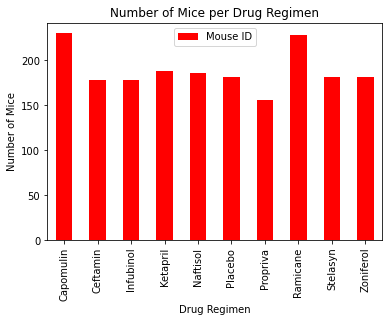

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug = cleaned_df.groupby("Drug Regimen")
mice_drug_count = pd.DataFrame(mice_drug["Mouse ID"].count())

mice_drug_chart = mice_drug_count.plot(kind='bar', title='Number of Mice per Drug Regimen', color='red')
mice_drug_chart.set_xlabel("Drug Regimen")
mice_drug_chart.set_ylabel("Number of Mice")

plt.show()

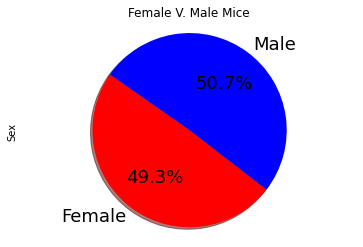

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = cleaned_df.groupby("Sex")
sex_count = mice_sex["Sex"].count()
sex_count
sex_chart = sex_count.plot(kind="pie", y='Sex', title="Female V. Male Mice", startangle=145,
                           autopct="%1.1f%%",shadow=True, fontsize=18, colors=["red","blue"],legend=False)
sex_chart.set_ylabel("Sex")

plt.axis("equal")
plt.show()



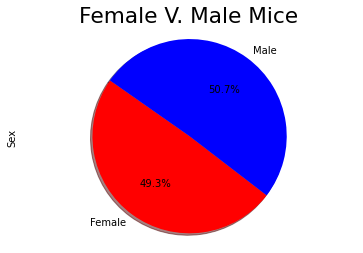

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fem_male = ["Female", "Male"]
sexes = ["49.3", "50.7"]
colors = ["red", "blue"]
plt.pie(sexes, labels=fem_male, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.rcParams['font.size']=18
plt.title("Female V. Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()




## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_merge = greatest_tumor.merge(cleaned_df, on = ["Mouse ID", "Timepoint"], how ="left")
data_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
  # Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []

for x in drug_list:
    tumor_vol = data_merge.loc[data_merge["Drug Regimen"] == x, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data_list.append(tumor_vol)
    
    #find outliers
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    final_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f" The drug {x} is a potential outlier {final_outliers}")
 

 The drug Capomulin is a potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
 The drug Ramicane is a potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)
 The drug Infubinol is a potential outlier 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 The drug Ceftamin is a potential outlier Series([], Name: Tumor Volume (mm3), dtype: float64)


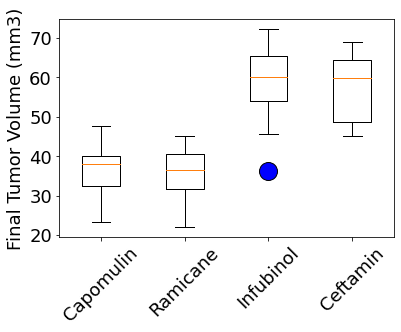

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot =dict(markerfacecolor = "blue", markersize = 18)
plt.boxplot(tumor_data_list, labels = drug_list, flierprops=box_plot,)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

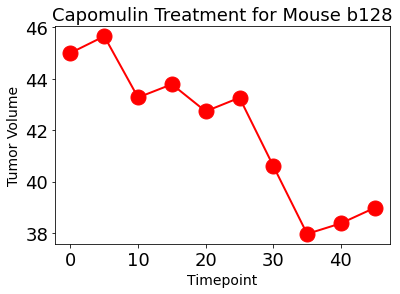

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treat = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
capomulin_mouse = capomulin_treat.loc[capomulin_treat["Mouse ID"] == "b128",:] 


x_axis = capomulin_mouse["Timepoint"]
tumor_size = capomulin_mouse["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment for Mouse b128", fontsize=18)
plt.plot(x_axis, tumor_size, linewidth=2, markersize=15, marker="o", color="red", label="Fahrenheit" )
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Tumor Volume', fontsize=14)

plt.show()

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_scatter = 

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
